<a href="https://colab.research.google.com/github/tansla/HWs_git/blob/master/CNA_HW_Tatiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNA Homework

## Part 1

**Reddit Networks**

Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/), select the subreddit of your favorite TV show (or you can choose any other dataset, containing the network data). Answer the following questions:

In [52]:
!pip install turicreate
!pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
!wget http://dynamics.cs.washington.edu/nobackup/reddit/theoffice.tar.gz

--2023-02-02 10:01:07--  http://dynamics.cs.washington.edu/nobackup/reddit/theoffice.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3550974 (3.4M) [application/x-gzip]
Saving to: ‘theoffice.tar.gz.1’

theoffice.tar.gz.1  100%[===================>]   3.39M  9.86MB/s    in 0.3s    

2023-02-02 10:01:08 (9.86 MB/s) - ‘theoffice.tar.gz.1’ saved [3550974/3550974]



In [54]:
import tarfile
fname = 'theoffice.tar.gz'
tar = tarfile.open(fname, "r:gz")
tar.extractall(path="./data/")
tar.close()

In [55]:
import os
import turicreate as tc 
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

g = tc.SGraph()
graphs_dir = 'data'
sframes_paths = [graphs_dir +'/' + s for s in os.listdir(graphs_dir)]
for folder in tqdm(sframes_paths):
    if not folder.endswith(".sgraph"):
        continue
    subG = tc.load_sgraph(folder)
    g = g.add_vertices(subG.get_vertices())
    g = g.add_edges(subG.get_edges())

  0%|          | 0/49 [00:00<?, ?it/s]

In [56]:
# converv SGraph to networkx, if needed

import networkx as nx

def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g

**Task 1 (_max score - 10 points_)**: Calculate and visualize the degree distribution of the vertices in the network

In [57]:
nx_g = sgraph2nxgraph(g)

In [58]:
d = nx_g.degree()
list(dict(d).items())[:20]

[('baseballrodent', 0),
 ('xcrouton', 1),
 ('poservarial', 0),
 ('scrantonfan', 1),
 ('Sir_SpamAL00t', 2),
 ('Ebonhawk23', 2),
 ('carrliadiere', 3),
 ('bronyking', 0),
 ('TaterGoodmoons', 0),
 ('rigtopia', 3),
 ('badidearobot', 0),
 ('naxypoo', 1),
 ('JSleek', 1),
 ('Strasner', 2),
 ('screenager93', 3),
 ('drebot', 1),
 ('UltimasXaero', 0),
 ('imaponysuckit', 3),
 ('CMUber', 2),
 ('TheGingerWannabe', 0)]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


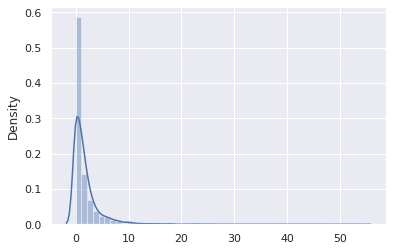

In [59]:
import seaborn as sns
%matplotlib inline
sns.set()
sns.distplot([v for v in dict(d).values()])

In [60]:
import numpy as np
degrees = []
for node in nx_g:
  degrees.append(nx_g.degree(node))
degrees = np.array(degrees)

In [ ]:
print(f'The % of nodes with 0 degree: {len(degrees[degrees==0])/ len(degrees):.2%}')

The % of nodes with 0 degree: 35.97%


**Task 2 (_max score - 15 points_)**: Create a subgraph of the top-20 users according to the PageRank algorithm. Draw the subgraph.

In [61]:
#According to PageRank:

d = nx.pagerank(nx_g)
selected_nodes_list = sorted(d, key=d.get, reverse=True)[:20] 
h = nx_g.subgraph(selected_nodes_list)
print('In subgraph:')
print('number of nodes:', h.number_of_nodes())
print('number of edges:', h.number_of_edges())

#import operator
#print(nx_g.number_of_nodes())
#print(nx_g.number_of_edges())
#max(dict(d).items(), key=operator.itemgetter(1))  
# sorted(d, key=d.get, reverse=True)[:20] 


In subgraph:
number of nodes: 20
number of edges: 10


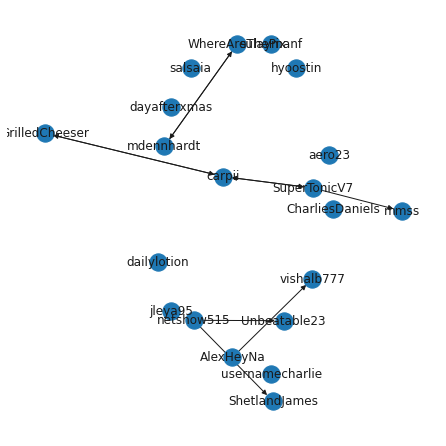

In [62]:
plt.figure(figsize=(6,6))
nx.draw_kamada_kawai(h, with_labels=True)

As we could notice - we loose some of the edges that was conected to the adges that was not in this subgraph.

**Task 3 (_max score - 15 points_)**: Visualize the distribution of the network's strongly and weakly connected components.

* As we didn't have the chance to review this in class, you can read shortly about these terms [here](https://www.geeksforgeeks.org/check-if-a-graph-is-strongly-unilaterally-or-weakly-connected/)
* This might be helpful: [networkx.weakly_connected_components](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.weakly_connected_components.html?highlight=weakly_connected_components#networkx.algorithms.components.weakly_connected_components) 

In [171]:
# Generate a sorted list of weakly connected components, largest first.
connected = [len(c) for c in sorted(nx.weakly_connected_components(nx_g), key=len, reverse=True)]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


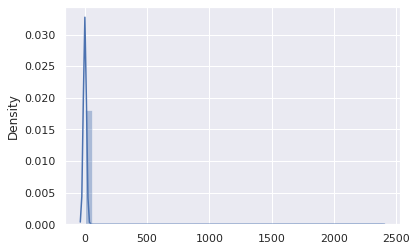

In [173]:
sns.distplot([v for v in connected])

**Task 4 (_max score - 10 points_)**: Split the network into communities, and find the __second__ most central vertex in each community (use degree_centrality).

In [63]:
# let's find cominuties:
from networkx.algorithms.community import greedy_modularity_communities
cc = greedy_modularity_communities(nx_g) # this can take some time
len(cc)

1900

In [64]:

for community in cc:
  # if there is only 1 vertex there will be no 2nd most
  if len(community) >= 2:
    sub = nx_g.subgraph(community)
    print("-"*100)
    print('number of nodes:', sub.number_of_nodes())
    print('number of edges:', sub.number_of_edges())
    d = nx.degree_centrality(sub)
    vertex = sorted(d, key=d.get, reverse=True)[1] 
    print("The second most central vertex by degree centrality:", vertex)

----------------------------------------------------------------------------------------------------
number of nodes: 175
number of edges: 252
The second most central vertex by degree centrality: ryanweiskopf
----------------------------------------------------------------------------------------------------
number of nodes: 145
number of edges: 196
The second most central vertex by degree centrality: SuperTonicV7
----------------------------------------------------------------------------------------------------
number of nodes: 139
number of edges: 187
The second most central vertex by degree centrality: Andewz111
----------------------------------------------------------------------------------------------------
number of nodes: 133
number of edges: 169
The second most central vertex by degree centrality: anyways_vs_anyway
----------------------------------------------------------------------------------------------------
number of nodes: 119
number of edges: 182
The second most cen

## Part 2

In [65]:
import networkx as nx
from networkx.algorithms.centrality import *
from scipy.stats import spearmanr 
from networkx.generators.geometric import random_geometric_graph
from networkx.algorithms.community import * 

### Lets generate some networks

Every network contains four sets of nodes. $a\in \{0.1,0.01\}$ is the probability for an edge between two nodes in the same set. $b\in \{0.1,0.01\}$ is the probability for an edge between two nodes in different communities.

In [129]:
blocks = [100,100,100,100]
probs = [
        [[a,b,b,b],
         [b,a,b,b],
         [b,b,a,b],
         [b,b,b,a]]
    for a,b in [(0.01,0.01),(0.1,0.01),(0.01,0.1)]
    ]

In [122]:
nets = [nx.generators.community.stochastic_block_model(blocks,p) for p in probs*100]
print("There are {} networks in total.".format(len(nets)))

There are 300 networks in total.


In [135]:
[p for p in probs*100][1]

[[0.1, 0.01, 0.01, 0.01],
 [0.01, 0.1, 0.01, 0.01],
 [0.01, 0.01, 0.1, 0.01],
 [0.01, 0.01, 0.01, 0.1]]

### Node centrality **(_max score - 10 points_)**
Your code is here: replace [] accordingly to the comment in the row



In [87]:
centralities =  [ {
                    'degree': [value for value in nx.degree_centrality(G).values()] , #replace [] with a sequence of node degree centralities 
                    'closeness': [value for value in nx.closeness_centrality(G).values()] , #replace [] with a sequence of node closeness centralities  
                    'betweenness': [value for value in nx.betweenness_centrality(G).values()]  #replace [] with a sequence of node betweenness centralities
                  } 
                for G in nets
                ]

In [88]:
#here we compute the corralations between the three centrality measures for each network
#every network is characterized by the tripplet of centrality correlations
centrality_correlations = [
    (
        spearmanr(c['degree'],c['closeness'])[0],
        spearmanr(c['degree'],c['betweenness'])[0],
        spearmanr(c['betweenness'],c['closeness'])[0],
    )
    for c in centralities
]

### Build a meta-network

where networks are nodes connected by an edge if their centrality correlations are similar 

In [154]:
radius = 0.025
G = random_geometric_graph(n=len(nets), radius=radius, dim=3, pos=dict(enumerate(centrality_correlations)))

In [144]:
print("number of nodes in G is the same as the number of networks in nets:{}".format(G.number_of_nodes()))
print("number of edges in G is:{}".format(G.number_of_edges()))

number of nodes in G is the same as the number of networks in nets:300
number of edges in G is:11136


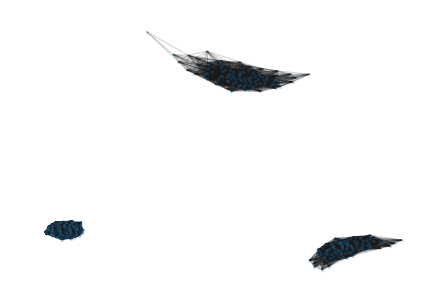

In [155]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos,node_size=5,alpha=0.2)

### Communities

#### What is the number of communities in nets[1]? **(_max score - 10 points_)**
- Use _greedy_modularity_communities_

In [96]:
#find the community structure of nets[1] and print the number of communities in nets[1]

cc = greedy_modularity_communities(nets[1]) # this can take some time
print('The number of communities in nets[1]:', len(cc))

The number of communities in nets[1]: 4


#### How could you know it without running community detection? **(_max score - 10 points_)**

In [136]:
# We know the structure of the probabilities for nets[1]:

[p for p in probs*100][1]

[[0.1, 0.01, 0.01, 0.01],
 [0.01, 0.1, 0.01, 0.01],
 [0.01, 0.01, 0.1, 0.01],
 [0.01, 0.01, 0.01, 0.1]]

As we create the net this matrix is abour "Element (r,s) gives the density of edges going from the nodes of group r to nodes of group s." so, for the nets[1] the density inside 4 groups are in 10 times higher and most probably will lead to creates 4 comminuties - the nodes with more edges inside than outside.

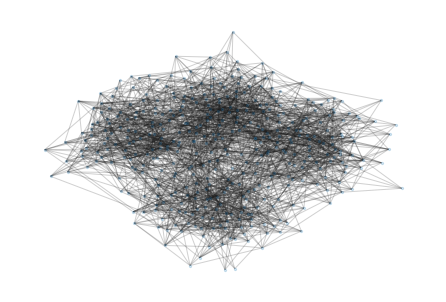

In [124]:
pos = nx.spring_layout(nets[1])
nx.draw(nets[1], pos=pos,node_size=5,alpha=0.2)

#### What is the number of communities in the meta-network G? **(_max score - 10 points_)**

In [94]:
# Find the number of communities in G
cc = greedy_modularity_communities(G) # this can take some time
print('The number of communities in G:', len(cc))

The number of communities in G: 3


#### Can you explain why this is the number of communities in G? **(_max score - 10 points_)**

We could see it on the graph and plot how this is changes with changig the radius - the bigger it will be the more edges will be added between nodes and more connected the graph will be.